In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
%cd "C:\DSBA\Advanced BA\Project"

C:\DSBA\Advanced BA\Project


In [3]:
df=pd.read_csv('SalesForce_Opportunity.csv')
df.head()

,Id,IsDeleted,AccountId,RecordTypeId,IsPrivate,StageName,StageSortOrder,Amount,Probability,ExpectedRevenue,...,stayclassy__Raw_Total_Gross_Amount__c,Event_Donation__c,Event_Sponsorship__c,Sponsorship_Type__c,Event_Donation_Type__c,Date_Letter_Sent__c,Tax_Letter_Sent_Through_Classy__c,Recurring_Donation_Frequency__c,Tier__c,stayclassy__Applied_FOT_Percent__c
0,0060z00001vL8DcAAK,0,0013800001E5JgdAAF,012500000000r6E,0,Closed Won,11.0,26.38,100,26.38,...,25.0,0.0,0.0,NaN,NaN,NaN,1.0,Monthly,NaN,NaN
1,0060z00001vL8MeAAK,0,0010z00001ShnMYAAZ,012500000000r6E,0,Closed Lost,12.0,127.20,0,0.00,...,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,0060z00001vL8ReAAK,0,0013800001BR7dMAAT,012500000000r6E,0,Closed Won,11.0,0.00,100,0.00,...,0.0,0.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,0060z00001vL8TBAA0,0,0013800001HI54mAAD,012500000000r6E,0,Closed Won,11.0,12721.09,100,12721.09,...,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,0060z00001vL8gWAAS,0,00138000019svbeAAA,012500000000r6E,0,Closed Won,11.0,50.00,100,50.00,...,50.0,0.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [4]:
df.shape

(10849, 130)

In [5]:
df.isnull().sum()

Id                                        0
IsDeleted                                 0
AccountId                                 0
RecordTypeId                             13
IsPrivate                                 0
                                      ...  
Date_Letter_Sent__c                   10846
Tax_Letter_Sent_Through_Classy__c      6340
Recurring_Donation_Frequency__c        9389
Tier__c                               10751
stayclassy__Applied_FOT_Percent__c    10338
Length: 130, dtype: int64

In [6]:
null_cnt=pd.DataFrame(df.isnull().sum())
null_cnt.reset_index(inplace=True)
null_cnt.columns=['Columns','NULL']
#null_cnt[null_cnt['NULL']>60000]['Columns'].tolist()
#null_cnt.to_csv('Contact_NULL.csv')

**Check Year**

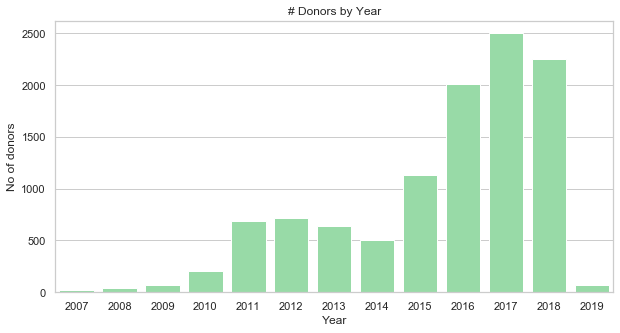

In [16]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))

# Plot the total items per category
sns.set_color_codes("pastel")
sns.barplot(x="index", y='FiscalYear', data=df['FiscalYear'].value_counts().reset_index(),
            label="# Items", color="g")

# Add a legend and informative axis label
ax.set( ylabel="No of donors", title='# Donors by Year',
       xlabel="Year")

plt.show()

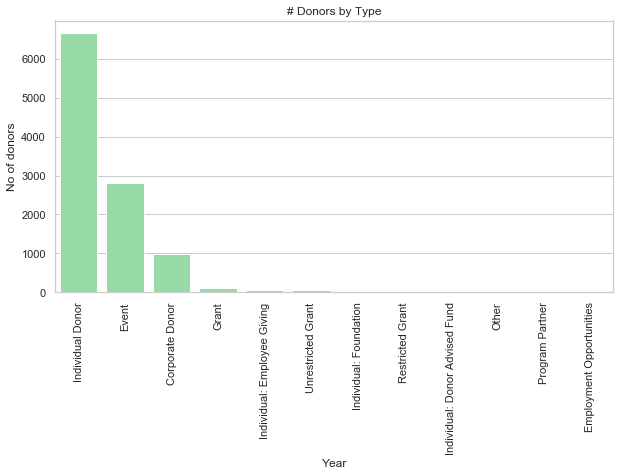

In [19]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))

# Plot the total items per category
sns.set_color_codes("pastel")
sns.barplot(x="index", y='Donation_Type__c', data=df['Donation_Type__c'].value_counts().reset_index(),
            label="# Items", color="g")

# Add a legend and informative axis label
ax.set( ylabel="No of donors", title='# Donors by Type',
       xlabel="Year")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

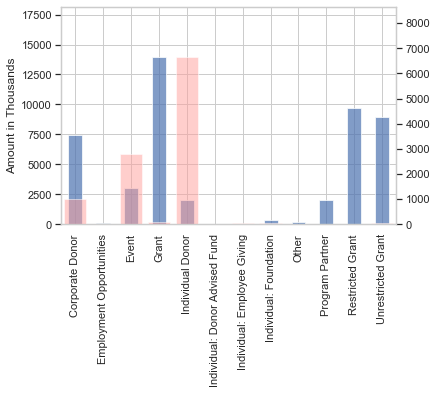

In [45]:
typ=df[['Donation_Type__c','Amount']]
typ['count']=1
typ['Amount']=typ['Amount']/1000
typ=typ.groupby('Donation_Type__c').sum()
typ.reset_index(inplace=True)

fig = plt.figure()
ax = typ['Amount'].plot(kind="bar", alpha=0.7)
ax.set_ylabel('Amount in Thousands')

ax2 = ax.twinx()
ax2.bar(ax.get_xticks(),typ['count'],color='r',alpha=0.5)

ax.set_xticklabels(typ['Donation_Type__c'])
ax.set_ylim(0,1.3*typ["Amount"].max())
ax2.set_ylim(0,1.3*typ["count"].max())
ax2.grid(False)
plt.show()
# fig = plt.figure()
# ax1 = fig.add_subplot(111)
# ax1.bar(typ['Donation_Type__c'], typ['Amount'])
# ax1.set_ylabel('Amount in Thousands')

# ax2 = ax1.twinx()
# ax2.bar(typ['Donation_Type__c'], typ['count'],color='r')
# ax2.set_ylabel('count')
# for tick in ax1.get_xticklabels():
#     tick.set_rotation(90)

# plt.show()

In [13]:
df['Amount'].quantile([0, 0.25, 0.5,0.8,0.9,1])

0.00          0.0
0.25         25.0
0.50         75.0
0.80        400.0
0.90       1680.0
1.00    3000000.0
Name: Amount, dtype: float64

**Analyze the high donations**

In [14]:
high=df[df['Amount']>=500]
high

,Id,IsDeleted,AccountId,RecordTypeId,IsPrivate,StageName,StageSortOrder,Amount,Probability,ExpectedRevenue,...,stayclassy__Raw_Total_Gross_Amount__c,Event_Donation__c,Event_Sponsorship__c,Sponsorship_Type__c,Event_Donation_Type__c,Date_Letter_Sent__c,Tax_Letter_Sent_Through_Classy__c,Recurring_Donation_Frequency__c,Tier__c,stayclassy__Applied_FOT_Percent__c
3,0060z00001vL8TBAA0,0,0013800001HI54mAAD,012500000000r6E,0,Closed Won,11.0,12721.09,100,12721.09,...,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
19,0060z00001vL91KAAS,0,0010z00001ShnYCAAZ,012500000000r6E,0,Closed Won,11.0,645.00,100,645.00,...,645.0,0.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,3.2
31,0060z00001vLAyeAAG,0,00138000019svlwAAA,012500000000r6E,0,Closed Won,11.0,1000.00,100,1000.00,...,1000.0,1.0,0.0,NaN,Registration,NaN,1.0,NaN,NaN,NaN
39,0060z00001vLCXlAAO,0,0010z00001ShoyKAAR,012500000000r6E,0,Closed Won,11.0,2500.00,100,2500.00,...,2500.0,0.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
48,0060z00001vjBEzAAM,0,00138000019svWmAAI,012500000000r6H,0,Grant Awarded,16.0,1350000.00,100,1350000.00,...,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,Tier 1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10844,0065000000OZx5TAAT,0,0015000000QdELIAA3,NaN,0,Posted,2.0,25000.00,100,25000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10845,0065000000Oa4S0AAJ,0,0015000000QdELIAA3,NaN,0,Posted,2.0,15000.00,100,15000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10846,0065000000Oac5gAAB,0,0015000000QdELIAA3,NaN,0,Posted,2.0,100000.00,100,100000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10847,0065000000PxgAcAAJ,0,0015000000qmSemAAE,NaN,0,Posted,2.0,10000.00,100,10000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Analyze grant**

In [4]:
high=df[['Id','StageName','Amount','Probability','ExpectedRevenue','CampaignId','FiscalYear','Donation_Type__c','npsp__Requested_Amount__c','Donation_Received__c','Grant_Restriction_Type__c','Foundation_or_Trust__c','stayclassy__cc_state__c','CreatedDate','Payment_Date__c']]
grant=high[high['Donation_Type__c']=='Grant']
grant

,Id,StageName,Amount,Probability,ExpectedRevenue,CampaignId,FiscalYear,Donation_Type__c,npsp__Requested_Amount__c,Donation_Received__c,Grant_Restriction_Type__c,Foundation_or_Trust__c,stayclassy__cc_state__c,CreatedDate,Payment_Date__c
69,0060z00001vyfFeAAI,Grant Prep,320.0,20,64.0,000000000000000AAA,2018,Grant,NaN,NaN,NaN,0.0,NaN,8/9/2018 12:24,NaN
70,0060z00001vyfQyAAI,Grant Denied,50000.0,0,0.0,000000000000000AAA,2018,Grant,100000.0,No,NaN,1.0,NaN,8/9/2018 13:35,NaN
690,0060z00001xoNrzAAE,Grant Submitted,NaN,30,NaN,000000000000000AAA,2018,Grant,25000.0,NaN,Unrestricted,0.0,NaN,11/5/2018 14:08,NaN
1212,0060z00001xpZujAAE,Grant Submitted,5000.0,30,1500.0,000000000000000AAA,2018,Grant,5000.0,NaN,NaN,0.0,NaN,1/4/2019 20:03,NaN
1815,0063800000aczqiAAA,Grant Awarded,50000.0,100,50000.0,000000000000000AAA,2015,Grant,NaN,NaN,NaN,NaN,NaN,4/29/2016 15:26,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10574,0063800000mIvuUAAS,Grant Submitted,10000.0,30,3000.0,000000000000000AAA,2018,Grant,10000.0,NaN,NaN,1.0,NaN,6/26/2018 13:33,NaN
10835,0065000000MKkiUAAT,Posted,25000.0,100,25000.0,000000000000000AAA,2014,Grant,NaN,NaN,NaN,NaN,NaN,2/26/2013 15:27,NaN
10837,0065000000Mv6tjAAB,Grant Awarded,15000.0,100,15000.0,000000000000000AAA,2013,Grant,NaN,NaN,NaN,1.0,NaN,4/1/2013 12:35,NaN
10841,0065000000OYOm5AAH,Grant Awarded,10000.0,100,10000.0,000000000000000AAA,2013,Grant,NaN,NaN,NaN,NaN,NaN,9/30/2013 15:59,NaN


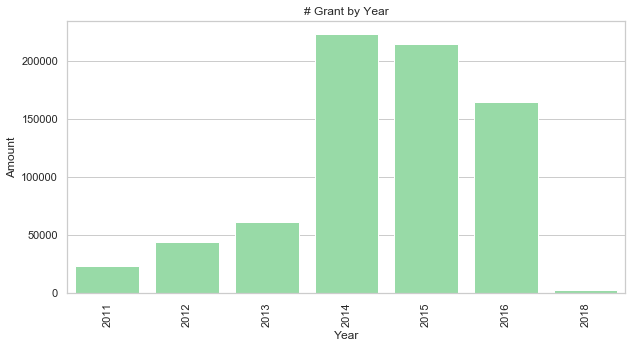

In [61]:
# Initialize the matplotlib figure
grnt_yr=grant[['FiscalYear','ExpectedRevenue']]
grnt_yr.groupby('FiscalYear').sum()
grnt_yr.reset_index(inplace=True)
grnt_yr.fillna(0,inplace=True)

f, ax = plt.subplots(figsize=(10, 5))

# Plot the total items per category
sns.set_color_codes("pastel")
sns.barplot(x="FiscalYear", y='ExpectedRevenue', data=grnt_yr, color="g",ci=None)

# Add a legend and informative axis label
ax.set(ylabel="Amount", title='# Grant by Year',
       xlabel="Year")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

In [57]:
grant[grant['Probability']<=50]


,Id,StageName,Amount,Probability,ExpectedRevenue,CampaignId,FiscalYear,Donation_Type__c,npsp__Requested_Amount__c,Donation_Received__c,Grant_Restriction_Type__c,Foundation_or_Trust__c
69,0060z00001vyfFeAAI,Grant Prep,320.0,20,64.0,000000000000000AAA,2018,Grant,NaN,NaN,NaN,0.0
70,0060z00001vyfQyAAI,Grant Denied,50000.0,0,0.0,000000000000000AAA,2018,Grant,100000.0,No,NaN,1.0
690,0060z00001xoNrzAAE,Grant Submitted,NaN,30,NaN,000000000000000AAA,2018,Grant,25000.0,NaN,Unrestricted,0.0
1212,0060z00001xpZujAAE,Grant Submitted,5000.0,30,1500.0,000000000000000AAA,2018,Grant,5000.0,NaN,NaN,0.0
9940,0063800000j4InlAAE,Prospecting,25000.0,10,2500.0,000000000000000AAA,2018,Grant,25000.0,No,Unrestricted,0.0
10335,0063800000lKImsAAG,Grant Denied,75000.0,0,0.0,000000000000000AAA,2018,Grant,NaN,No,NaN,0.0
10474,0063800000mIR8MAAW,LOI Prep,125000.0,10,12500.0,000000000000000AAA,2018,Grant,NaN,No,NaN,0.0
10574,0063800000mIvuUAAS,Grant Submitted,10000.0,30,3000.0,000000000000000AAA,2018,Grant,10000.0,NaN,NaN,1.0


**Question: is the expected revenue the profit??**

*Which are the most effective campaigns*

In [71]:
grnt_camp=grant[['CampaignId','FiscalYear','ExpectedRevenue']]
grnt_camp=grnt_camp.groupby(['CampaignId','FiscalYear']).sum()
grnt_camp.reset_index(inplace=True)
grnt_camp.sort_values(by=['FiscalYear','ExpectedRevenue'], ascending=False,inplace=True)
grnt_camp

,CampaignId,FiscalYear,ExpectedRevenue
6,000000000000000AAA,2018,19564.00
5,000000000000000AAA,2016,4748232.67
8,70138000000qRhxAAE,2016,190391.80
4,000000000000000AAA,2015,4081412.79
3,000000000000000AAA,2014,2846504.53
7,70138000000jPNbAAM,2014,60000.00
2,000000000000000AAA,2013,921937.00
1,000000000000000AAA,2012,654250.00
0,000000000000000AAA,2011,161000.00


*there are totally 3 campaign for grant*

**Other high ones are restricted grant and unrestricted grant**

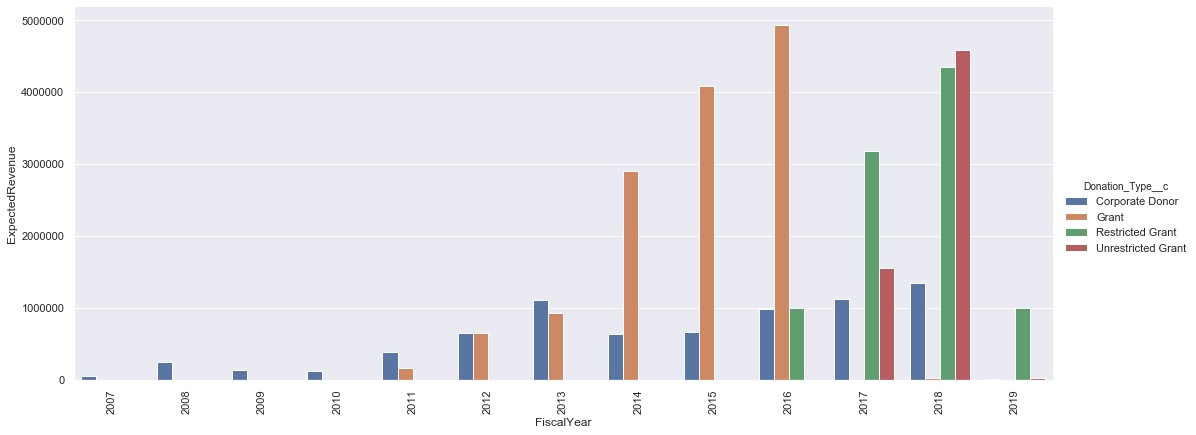

In [88]:
plt_rev=high[['Donation_Type__c','FiscalYear','ExpectedRevenue']]
plt_rev=plt_rev[(plt_rev['Donation_Type__c']=='Restricted Grant')|(plt_rev['Donation_Type__c']=='Unrestricted Grant')|(plt_rev['Donation_Type__c']=='Corporate Donor')|(plt_rev['Donation_Type__c']=='Grant')]
plt_rev=plt_rev.groupby(['Donation_Type__c','FiscalYear']).sum()
plt_rev.reset_index(inplace=True)

#Plot
sns.set(rc={'figure.figsize':(15,6)})
ax=sns.factorplot(x='FiscalYear', y='ExpectedRevenue', hue='Donation_Type__c', data=plt_rev, kind='bar',height=6, aspect=15/6)

ax.set_xticklabels(rotation=90)
plt.show()


In [72]:
res_grant=high[(high['Donation_Type__c']=='Restricted Grant')]
res_grant

,Id,StageName,Amount,Probability,ExpectedRevenue,CampaignId,FiscalYear,Donation_Type__c,npsp__Requested_Amount__c,Donation_Received__c,Grant_Restriction_Type__c,Foundation_or_Trust__c
48,0060z00001vjBEzAAM,Grant Awarded,1350000.0,100,1350000.0,000000000000000AAA,2018,Restricted Grant,1350000.0,No,NaN,1.0
238,0060z00001wq6b4AAA,Grant Prep,50000.0,20,10000.0,000000000000000AAA,2018,Unrestricted Grant,NaN,No,NaN,0.0
467,0060z00001xRNIAAA4,Grant Submitted,50000.0,30,15000.0,000000000000000AAA,2018,Unrestricted Grant,50000.0,No,Unrestricted,0.0
1044,0060z00001xpPV5AAM,Grant Awarded,300000.0,100,300000.0,000000000000000AAA,2018,Unrestricted Grant,400000.0,Yes,NaN,1.0
1070,0060z00001xpR3mAAE,Grant Awarded,350000.0,100,350000.0,000000000000000AAA,2018,Restricted Grant,NaN,Yes,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10410,0063800000mHgOTAA0,Grant Awarded,150000.0,100,150000.0,000000000000000AAA,2018,Unrestricted Grant,150000.0,Yes,NaN,1.0
10688,0063800000mJ6GrAAK,Grant Awarded,300000.0,100,300000.0,000000000000000AAA,2018,Unrestricted Grant,NaN,Yes,NaN,0.0
10709,0063800000mJBrNAAW,Grant Submitted,30000.0,30,9000.0,000000000000000AAA,2018,Unrestricted Grant,NaN,No,NaN,0.0
10767,0063800000mJNgsAAG,Grant Awarded,100000.0,100,100000.0,000000000000000AAA,2018,Restricted Grant,100000.0,No,Restricted,1.0


In [95]:
grnt_camp=res_grant[['CampaignId','FiscalYear','ExpectedRevenue']]
grnt_camp=grnt_camp.groupby(['CampaignId','FiscalYear']).sum()
grnt_camp.reset_index(inplace=True)
grnt_camp.sort_values(by=['FiscalYear','ExpectedRevenue'], ascending=False,inplace=True)
grnt_camp

,CampaignId,FiscalYear,ExpectedRevenue
3,000000000000000AAA,2019,1020000.00
2,000000000000000AAA,2018,8944725.00
1,000000000000000AAA,2017,4602394.57
4,70138000000qRhxAAE,2017,92150.39
5,70138000001QKA6AAO,2017,31961.14
0,000000000000000AAA,2016,1000000.00


**000000000000000AAA campaign is the one covering most of the major donations.Lets analyze this further**

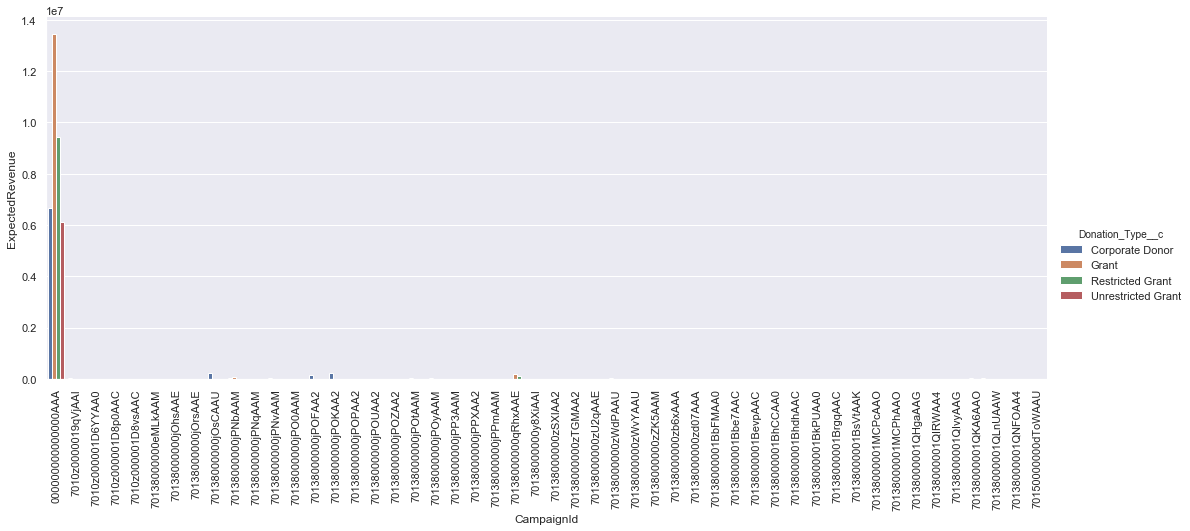

In [100]:
camp=high[['CampaignId','Donation_Type__c','FiscalYear','ExpectedRevenue']]
camp=camp[(camp['Donation_Type__c']=='Restricted Grant')|(camp['Donation_Type__c']=='Unrestricted Grant')|(camp['Donation_Type__c']=='Corporate Donor')|(camp['Donation_Type__c']=='Grant')]
camp=camp.groupby(['CampaignId','Donation_Type__c']).sum()
camp.reset_index(inplace=True)
#Plot
sns.set(rc={'figure.figsize':(20,6)})
ax=sns.factorplot(x='CampaignId', y='ExpectedRevenue', hue='Donation_Type__c', data=camp, kind='bar',height=6, aspect=15/6)

ax.set_xticklabels(rotation=90)
plt.show()

*As we can observe its a single campaign driving most of the sales*

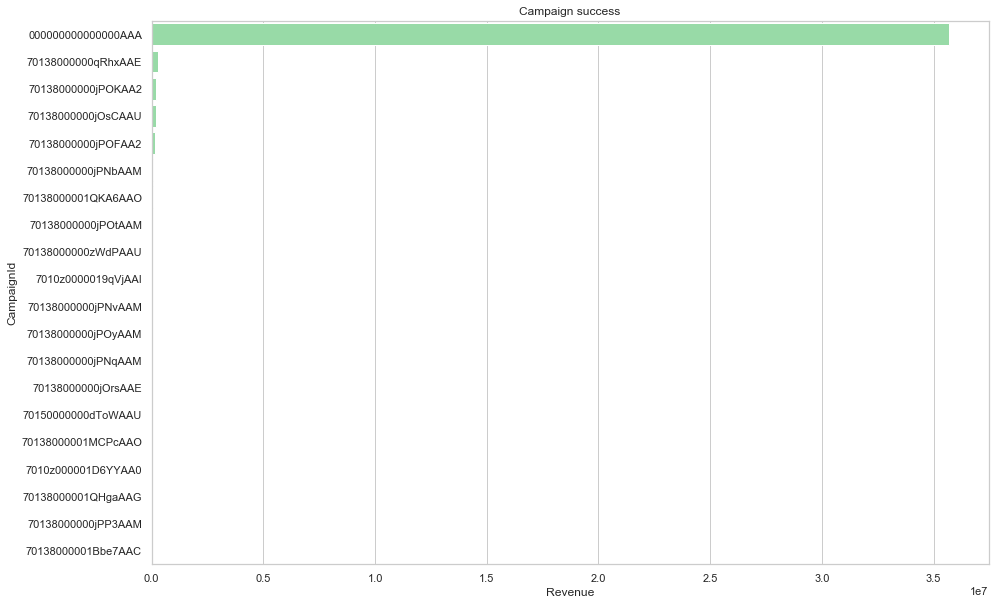

In [106]:
sns.set(style="whitegrid")

camp1=camp.drop(['Donation_Type__c'],axis=1)
camp1=camp1.groupby(['CampaignId']).sum()
camp1.reset_index(inplace=True)
camp1.sort_values(by=['ExpectedRevenue'], ascending=False,inplace=True)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Plot the total items per category
sns.set_color_codes("pastel")
sns.barplot(x="ExpectedRevenue", y='CampaignId', data=camp1[:20],
            label="# Items", color="g",ci=None)

# Add a legend and informative axis label
ax.set( ylabel="CampaignId", title='Campaign success',
       xlabel="Revenue")

plt.show()

In [107]:
camp1[:20]

,CampaignId,FiscalYear,ExpectedRevenue
0,000000000000000AAA,1889744,35675753.15
23,70138000000qRhxAAE,14115,282542.19
14,70138000000jPOKAA2,10063,212351.00
8,70138000000jOsCAAU,58472,210458.53
13,70138000000jPOFAA2,10053,148333.33
9,70138000000jPNbAAM,66475,72871.17
46,70138000001QKA6AAO,6051,53961.14
18,70138000000jPOtAAM,22132,21650.00
28,70138000000zWdPAAU,86773,17670.32
1,7010z0000019qVjAAI,4036,14302.00


In [119]:
camp1[:1]['ExpectedRevenue'].sum()/df['ExpectedRevenue'].sum()

0.7654718824423663

In [120]:
camp1[1:]['ExpectedRevenue'].sum()/df['ExpectedRevenue'].sum()

0.024559702967467668

**So this single campaign covers most of the revenue.About 76% of the money is generated from this mostly from grants and coorporate donations.Other types of donations can be analyzed seperately**

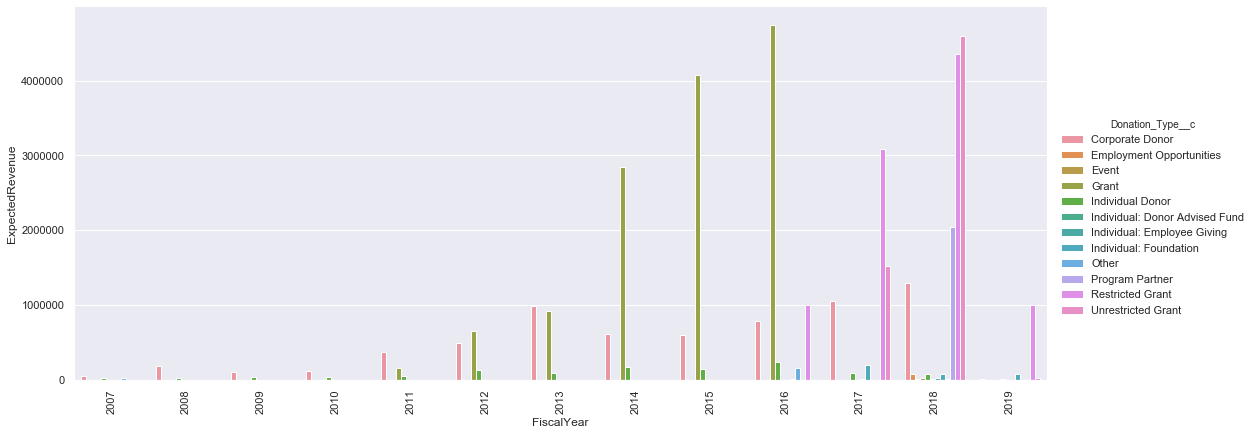

In [122]:
camp2=high[['CampaignId','Donation_Type__c','FiscalYear','ExpectedRevenue']]
camp2=camp2[camp2['CampaignId']=='000000000000000AAA']

plt_rev=camp2[['Donation_Type__c','FiscalYear','ExpectedRevenue']]
#plt_rev=plt_rev[(plt_rev['Donation_Type__c']=='Restricted Grant')|(plt_rev['Donation_Type__c']=='Unrestricted Grant')|(plt_rev['Donation_Type__c']=='Corporate Donor')|(plt_rev['Donation_Type__c']=='Grant')]
plt_rev=plt_rev.groupby(['Donation_Type__c','FiscalYear']).sum()
plt_rev.reset_index(inplace=True)

#Plot
sns.set(rc={'figure.figsize':(15,6)})
ax=sns.factorplot(x='FiscalYear', y='ExpectedRevenue', hue='Donation_Type__c', data=plt_rev, kind='bar',height=6, aspect=15/6)

ax.set_xticklabels(rotation=90)
plt.show()



**See if there is any pattern across months**

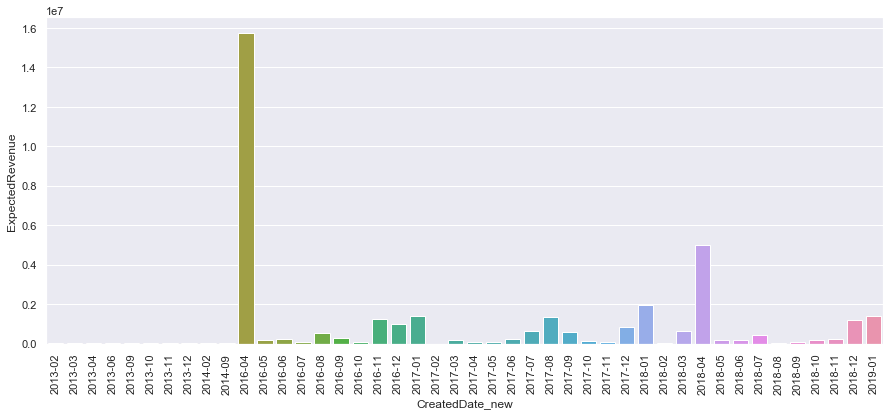

In [169]:
camp3=high[['CampaignId','Donation_Type__c','CreatedDate','ExpectedRevenue']]
camp3=camp3[(camp3['Donation_Type__c']=='Restricted Grant')|(camp3['Donation_Type__c']=='Unrestricted Grant')|(camp3['Donation_Type__c']=='Corporate Donor')|(camp3['Donation_Type__c']=='Grant')]
camp3['CreatedDate']=pd.to_datetime(camp3['CreatedDate'])
camp3['CreatedDate_new'] = camp3['CreatedDate'].apply(lambda dt: dt.replace(day=1))
camp3['CreatedDate_new']=camp3['CreatedDate_new'].dt.date
# camp3['Month']=camp3['CreatedDate'].dt.month
# camp3['Year']=camp3['CreatedDate'].dt.year
# camp3['Month_Year']=camp3['Month'].astype(str)+"_"+camp3['Year'].astype(str)
# camp3.sort_values(by=['Month_Year'], ascending=False,inplace=True)
#camp3['CreatedDate_new'] = pd.to_datetime(camp3['CreatedDate_new'], format='%Y%m', errors='ignore')

mnth=camp3.groupby(['CreatedDate_new']).sum()
#mnth['CreatedDate_new']=pd.to_datetime(mnth['CreatedDate_new'])
mnth.reset_index(inplace=True)

# PLOTTING
fig, ax = plt.subplots(figsize = (15,6))    
fig = sns.barplot(x = "CreatedDate_new", y = "ExpectedRevenue", data = mnth, 
                  ci = None, ax=ax)

x_dates = pd.to_datetime(camp3['CreatedDate_new']).dt.strftime('%Y-%m').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=90, ha='center')

# f, ax = plt.subplots(figsize=(10, 5))

# # Plot the total items per category
# sns.set_color_codes("pastel")
# sns.barplot(x='CreatedDate_new', y='ExpectedRevenue', data=mnth, color="g",ci=None,ax=ax)

# # Add a legend and informative axis label
# ax.set(ylabel="Amount", title='# Donation by Month',
#        xlabel="Month")
# x_dates = mnth['CreatedDate_new'].dt.strftime('%Y-%m').sort_values().unique()
# ax.set_xticklabels(labels=x_dates, rotation=90, ha='right')
# #ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

**what happended in 4th of 2016 and 2018? Other years nov, dec and Jan have some donations**

*Analyze further that month, what caused that donation?*

In [177]:
mnth4=camp3[(camp3['CreatedDate'].dt.month==4)&(camp3['CreatedDate'].dt.year==2016)]
mnth4.sort_values(by=['ExpectedRevenue'], ascending=False,inplace=True)
mnth4

,CampaignId,Donation_Type__c,CreatedDate,ExpectedRevenue,CreatedDate_new
3589,000000000000000AAA,Grant,2016-04-07 21:35:00,1454941.80,2016-04-01
5702,000000000000000AAA,Grant,2016-04-07 21:38:00,1405000.00,2016-04-01
5709,000000000000000AAA,Grant,2016-04-07 21:38:00,1383000.00,2016-04-01
5703,000000000000000AAA,Grant,2016-04-07 21:38:00,1321500.00,2016-04-01
3587,000000000000000AAA,Grant,2016-04-07 21:35:00,641727.60,2016-04-01
4075,000000000000000AAA,Grant,2016-04-07 21:36:00,500000.00,2016-04-01
4020,000000000000000AAA,Grant,2016-04-07 21:36:00,489300.00,2016-04-01
3588,000000000000000AAA,Grant,2016-04-07 21:35:00,320863.80,2016-04-01
5574,000000000000000AAA,Grant,2016-04-07 21:38:00,300000.00,2016-04-01
4623,000000000000000AAA,Grant,2016-04-07 21:37:00,200000.00,2016-04-01


In [178]:
mnth4['CampaignId'].value_counts()

000000000000000AAA    545
70138000000jPNbAAM     33
70138000000jPOtAAM     11
70138000000jPOUAA2      7
70138000000jPNvAAM      7
70138000000jPOyAAM      6
70138000000jPOFAA2      5
70138000000jPOKAA2      5
70150000000dToWAAU      5
70138000000jPNqAAM      4
70138000000jPO0AAM      4
70138000000jPOZAA2      4
70138000000jOsCAAU      3
70138000001BrgqAAC      1
70138000000jPPXAA2      1
70138000000jPP3AAM      1
70138000000jPPmAAM      1
70138000000eMLkAAM      1
70138000000jPOPAA2      1
Name: CampaignId, dtype: int64

*This one campaign covered most of the donations. 32% of all the donations came on a single month from a single campaign*

In [180]:
mnth4[mnth4['CampaignId']=='000000000000000AAA']['ExpectedRevenue'].sum()/df['ExpectedRevenue'].sum()

0.32604339776720076

In [181]:
mnth4[mnth4['CampaignId']=='000000000000000AAA']['CreatedDate'].value_counts()

2016-04-07 21:34:00    193
2016-04-07 21:35:00    141
2016-04-07 21:38:00     97
2016-04-07 21:37:00     78
2016-04-07 21:33:00     26
2016-04-07 21:36:00      5
2016-04-26 16:58:00      1
2016-04-29 15:36:00      1
2016-04-29 15:34:00      1
2016-04-29 15:26:00      1
2016-04-18 19:24:00      1
Name: CreatedDate, dtype: int64

*Most of the collection seem  to have happened on a single day.Analyze it further*

In [182]:
day7=camp3[(camp3['CreatedDate'].dt.month==4)&(camp3['CreatedDate'].dt.year==2016)&(camp3['CreatedDate'].dt.day==7)]
day7.sort_values(by=['ExpectedRevenue'], ascending=False,inplace=True)
day7

,CampaignId,Donation_Type__c,CreatedDate,ExpectedRevenue,CreatedDate_new
3589,000000000000000AAA,Grant,2016-04-07 21:35:00,1454941.8,2016-04-01
5702,000000000000000AAA,Grant,2016-04-07 21:38:00,1405000.0,2016-04-01
5709,000000000000000AAA,Grant,2016-04-07 21:38:00,1383000.0,2016-04-01
5703,000000000000000AAA,Grant,2016-04-07 21:38:00,1321500.0,2016-04-01
3587,000000000000000AAA,Grant,2016-04-07 21:35:00,641727.6,2016-04-01
...,...,...,...,...,...
4645,000000000000000AAA,Corporate Donor,2016-04-07 21:37:00,4.0,2016-04-01
4648,000000000000000AAA,Corporate Donor,2016-04-07 21:37:00,4.0,2016-04-01
4647,000000000000000AAA,Corporate Donor,2016-04-07 21:37:00,4.0,2016-04-01
4643,000000000000000AAA,Corporate Donor,2016-04-07 21:37:00,4.0,2016-04-01


In [183]:
day7[day7['CampaignId']=='000000000000000AAA']['ExpectedRevenue'].sum()/df['ExpectedRevenue'].sum()

0.3245290710172207

*So this single campaign made 32% of the total donations on a single day*

*How about the 2018 donations??*

In [184]:
mnth4_18=camp3[(camp3['CreatedDate'].dt.month==4)&(camp3['CreatedDate'].dt.year==2018)]
mnth4_18.sort_values(by=['ExpectedRevenue'], ascending=False,inplace=True)
mnth4_18

,CampaignId,Donation_Type__c,CreatedDate,ExpectedRevenue,CreatedDate_new
10278,000000000000000AAA,Unrestricted Grant,2018-04-24 18:21:00,3000000.00,2018-04-01
10281,000000000000000AAA,Restricted Grant,2018-04-24 18:27:00,1000000.00,2018-04-01
10280,000000000000000AAA,Restricted Grant,2018-04-24 18:24:00,780000.00,2018-04-01
10279,000000000000000AAA,Unrestricted Grant,2018-04-24 18:22:00,150000.00,2018-04-01
10274,000000000000000AAA,Unrestricted Grant,2018-04-24 14:24:00,32725.00,2018-04-01
10197,000000000000000AAA,Corporate Donor,2018-04-10 14:18:00,15058.00,2018-04-01
10233,000000000000000AAA,Corporate Donor,2018-04-17 17:33:00,4500.00,2018-04-01
10238,000000000000000AAA,Corporate Donor,2018-04-17 17:39:00,2000.00,2018-04-01
10276,000000000000000AAA,Corporate Donor,2018-04-24 15:54:00,1159.75,2018-04-01
10193,000000000000000AAA,Unrestricted Grant,2018-04-10 13:56:00,1000.00,2018-04-01


In [185]:
mnth4_18[mnth4_18['CampaignId']=='000000000000000AAA']['ExpectedRevenue'].sum()/df['ExpectedRevenue'].sum()

0.10703008232289196

*Again 10% of total donation came on this single month*

In [192]:
mnth4_18['Day']=mnth4_18['CreatedDate'].dt.day
day_18=mnth4_18[['Day','ExpectedRevenue']].groupby('Day').sum()
day_18.reset_index(inplace=True)
day_18.sort_values(by=['ExpectedRevenue'], ascending=False,inplace=True)
day_18

,Day,ExpectedRevenue
4,24,4964399.75
1,10,17058.00
3,17,6810.12
5,28,850.00
0,2,11.66
2,11,10.63


In [194]:
day_18['ExpectedRevenue'][4]/df['ExpectedRevenue'].sum()

0.10651795929440419

*Again this 10% came from a single day from a single campaign*

**Analyze individual donations**

In [8]:
high['Donation_Type__c'].fillna('',inplace=True)
ind=high[high['Donation_Type__c'].str.contains('Individual')]
ind

,Id,StageName,Amount,Probability,ExpectedRevenue,CampaignId,FiscalYear,Donation_Type__c,npsp__Requested_Amount__c,Donation_Received__c,Grant_Restriction_Type__c,Foundation_or_Trust__c,stayclassy__cc_state__c,CreatedDate,Payment_Date__c
0,0060z00001vL8DcAAK,Closed Won,26.38,100,26.38,70138000001MCPcAAO,2018,Individual Donor,NaN,Yes,NaN,0.0,NY,8/14/2018 9:23,8/22/2018 0:00
6,0060z00001vL8sXAAS,Closed Won,200.00,100,200.00,70138000000zWdPAAU,2018,Individual Donor,NaN,Yes,NaN,0.0,AZ,8/14/2018 16:31,8/15/2018 0:00
7,0060z00001vL8sYAAS,Closed Won,25.00,100,25.00,70138000001MCPhAAO,2018,Individual Donor,NaN,Yes,NaN,0.0,TX,8/14/2018 16:31,8/15/2018 0:00
8,0060z00001vL8sZAAS,Closed Won,20.96,100,20.96,70138000001MCPhAAO,2018,Individual Donor,NaN,Yes,NaN,0.0,NJ,8/14/2018 16:31,8/15/2018 0:00
10,0060z00001vL8scAAC,Closed Won,20.64,100,20.64,70138000000zWdPAAU,2018,Individual Donor,NaN,Yes,NaN,0.0,OH,8/14/2018 16:31,8/15/2018 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10828,0063800000mJeY8AAK,Closed Won,20.00,100,20.00,70138000000zWdPAAU,2018,Individual Donor,NaN,Yes,NaN,0.0,GA,8/4/2018 9:01,8/10/2018 0:00
10829,0063800000mJeYIAA0,Closed Won,10.73,100,10.73,70138000001MCPcAAO,2018,Individual Donor,NaN,Yes,NaN,0.0,CT,8/4/2018 9:20,8/10/2018 0:00
10831,0063800000mJeZ1AAK,Closed Won,103.20,100,103.20,70138000000zWdPAAU,2018,Individual Donor,NaN,Yes,NaN,0.0,IL,8/4/2018 10:18,8/10/2018 0:00
10844,0065000000OZx5TAAT,Posted,25000.00,100,25000.00,000000000000000AAA,2013,Individual Donor,NaN,NaN,NaN,NaN,NaN,12/4/2013 15:05,NaN


In [9]:
ind['Donation_Type__c'].value_counts()

Individual Donor                  6649
Individual: Employee Giving         68
Individual: Foundation              43
Individual: Donor Advised Fund      14
Name: Donation_Type__c, dtype: int64

Since dominated by first category, lets analyze it further

In [10]:
ind=ind[ind['Donation_Type__c']=='Individual Donor']
ind

,Id,StageName,Amount,Probability,ExpectedRevenue,CampaignId,FiscalYear,Donation_Type__c,npsp__Requested_Amount__c,Donation_Received__c,Grant_Restriction_Type__c,Foundation_or_Trust__c,stayclassy__cc_state__c,CreatedDate,Payment_Date__c
0,0060z00001vL8DcAAK,Closed Won,26.38,100,26.38,70138000001MCPcAAO,2018,Individual Donor,NaN,Yes,NaN,0.0,NY,8/14/2018 9:23,8/22/2018 0:00
6,0060z00001vL8sXAAS,Closed Won,200.00,100,200.00,70138000000zWdPAAU,2018,Individual Donor,NaN,Yes,NaN,0.0,AZ,8/14/2018 16:31,8/15/2018 0:00
7,0060z00001vL8sYAAS,Closed Won,25.00,100,25.00,70138000001MCPhAAO,2018,Individual Donor,NaN,Yes,NaN,0.0,TX,8/14/2018 16:31,8/15/2018 0:00
8,0060z00001vL8sZAAS,Closed Won,20.96,100,20.96,70138000001MCPhAAO,2018,Individual Donor,NaN,Yes,NaN,0.0,NJ,8/14/2018 16:31,8/15/2018 0:00
10,0060z00001vL8scAAC,Closed Won,20.64,100,20.64,70138000000zWdPAAU,2018,Individual Donor,NaN,Yes,NaN,0.0,OH,8/14/2018 16:31,8/15/2018 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10828,0063800000mJeY8AAK,Closed Won,20.00,100,20.00,70138000000zWdPAAU,2018,Individual Donor,NaN,Yes,NaN,0.0,GA,8/4/2018 9:01,8/10/2018 0:00
10829,0063800000mJeYIAA0,Closed Won,10.73,100,10.73,70138000001MCPcAAO,2018,Individual Donor,NaN,Yes,NaN,0.0,CT,8/4/2018 9:20,8/10/2018 0:00
10831,0063800000mJeZ1AAK,Closed Won,103.20,100,103.20,70138000000zWdPAAU,2018,Individual Donor,NaN,Yes,NaN,0.0,IL,8/4/2018 10:18,8/10/2018 0:00
10844,0065000000OZx5TAAT,Posted,25000.00,100,25000.00,000000000000000AAA,2013,Individual Donor,NaN,NaN,NaN,NaN,NaN,12/4/2013 15:05,NaN


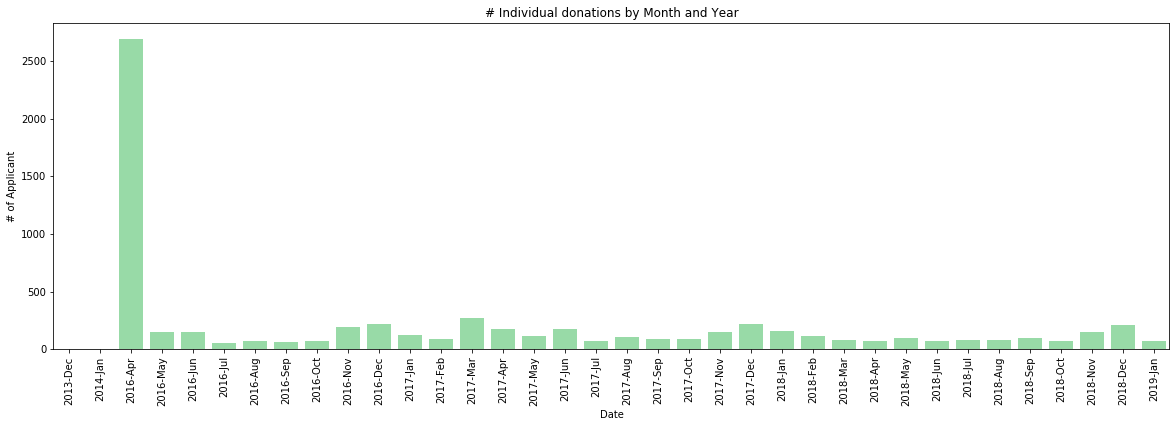

In [12]:
##Plot by date
ind['CreatedDate']=pd.to_datetime(ind['CreatedDate'])
ind['Created_date_new'] = ind['CreatedDate'].apply(lambda dt: dt.replace(day=1))
ind['Created_date_new']=ind['Created_date_new'].dt.date
ind.sort_values(by=['Created_date_new'],ascending=True,inplace=True)

# PLOTTING
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 6))

# Plot the total items per category
sns.set_color_codes("pastel")
sns.barplot(x="index", y='Created_date_new', data=ind['Created_date_new'].value_counts().sort_index().reset_index(),
            label="# Items", color="g")

# Add a legend and informative axis label
ax.set( ylabel="# of Applicant", title='# Individual donations by Month and Year',
       xlabel="Date")

x_dates = pd.to_datetime(ind['Created_date_new']).dt.strftime('%Y-%b').unique()
ax.set_xticklabels(labels=x_dates,rotation=90)

plt.show()

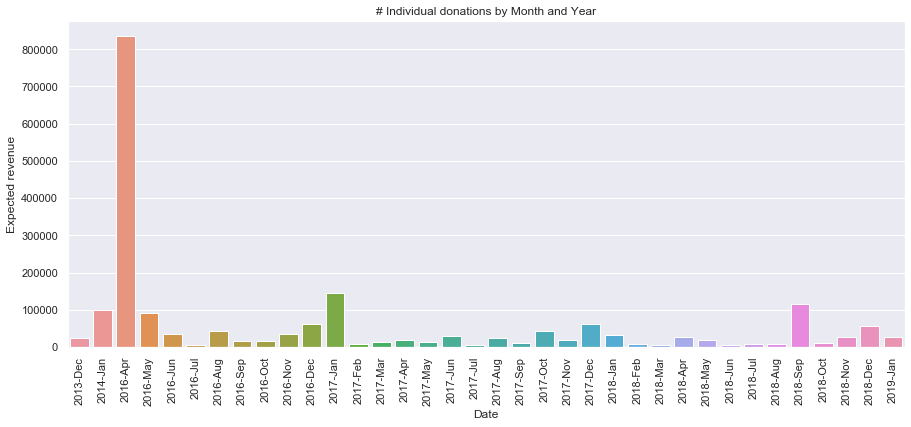

In [22]:
#Revenue from individual donations
plt_rev=ind[['Donation_Type__c','Created_date_new','ExpectedRevenue']]
#plt_rev=plt_rev[(plt_rev['Donation_Type__c']=='Restricted Grant')|(plt_rev['Donation_Type__c']=='Unrestricted Grant')|(plt_rev['Donation_Type__c']=='Corporate Donor')|(plt_rev['Donation_Type__c']=='Grant')]
plt_rev=plt_rev.groupby(['Created_date_new']).sum()
plt_rev.reset_index(inplace=True)

#Plot
sns.set(rc={'figure.figsize':(15,6)})
ax=sns.barplot(x='Created_date_new', y='ExpectedRevenue', data=plt_rev)

# Add a legend and informative axis label
ax.set( ylabel="Expected revenue", title='Individual donations by Month and Year',
       xlabel="Date")

x_dates = pd.to_datetime(plt_rev['Created_date_new']).dt.strftime('%Y-%b')
ax.set_xticklabels(labels=x_dates,rotation=90)
plt.show()